# Preâmbulo
Inteligência artificial, aprendizagem de máquina e estatística são campos fundamentalmente entrelaçados, assim sendo, antes de tratar de processos de classificão propriamente ditos devemos relembrar de alguns conceitos fundamentais de estatística para verdadeiramente compreender os algoritmos tratados adiante.

## Medidas de Posição
* Média
* Mediana
* Moda
* Percentis

O objetivo de um algoritmo de ML é fazer uma predição mais fundamentada do que um mero chute. Uma das formas mais rudimentares de fazer isso é através da média. Observe o código à seguir.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [15]:
# Criando uma base de dados com 100 linhas e 2 colunas, e valores variando entre 0 e 1
df_pre = pd.DataFrame(np.random.normal(0, 1, size=(100, 2)), columns=['x1', 'x2'])
# Tentando prever os valores de x1 através de chutes aleatórios e armazenndo os resultados em uma nova coluna 'chute'
df_pre["chute"] = np.random.default_rng().uniform(-1, 1, size=(100))
# Tentando prever os valores de x1 utilizando a média e armazenando os resultados em uma nova coluna 'media'
df_pre["media"] = 0
df_pre

,x1,x2,chute,media
0,-0.153921,1.252577,0.077308,0
1,0.648468,-0.671130,0.792413,0
2,0.734132,-1.176308,-0.825415,0
3,1.620427,-0.620506,0.260826,0
4,-0.227932,1.043642,-0.050124,0
...,...,...,...,...
95,-0.090960,-0.464922,-0.660255,0
96,-0.519933,0.879777,-0.062622,0
97,0.444749,1.090813,0.391038,0
98,1.518598,-0.369088,-0.271719,0


Para avaliar a acurácia da nossa predição, calculamos o erro quadrado médio (mean squared error, MSE) entre os resultados reais e as nosssas predições. O cálculo é simples, para um ponto, verificamos a diferença entre a predição e o resultado real e elevamos ao quadrado. Este é o erro quadrado daquele ponto. O erro quadrado médio do modelo consiste na média da soma dos quadrados das diferenças entre os resultados reais e os resultados preditos, divididos pelo tamanho da amostra. Em matematiquês:
$$MSE=\frac{1}{N}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2$$

Usamos a função `mean_squared_error()` da biblioteca scikit_learn para calcular o MSE do nosso modelo.

In [18]:
mse_chute = mean_squared_error(df_pre['x1'], df_pre['chute'])
mse_media = mean_squared_error(df_pre['x1'], df_pre['media'])
print("Erro quadrado médio do chute: ", mse_chute)
print("Erro quadrado médio da média: ", mse_media)

Erro quadrado médio do chute:  1.1001989590569687
Erro quadrado médio da média:  0.8769623347353737


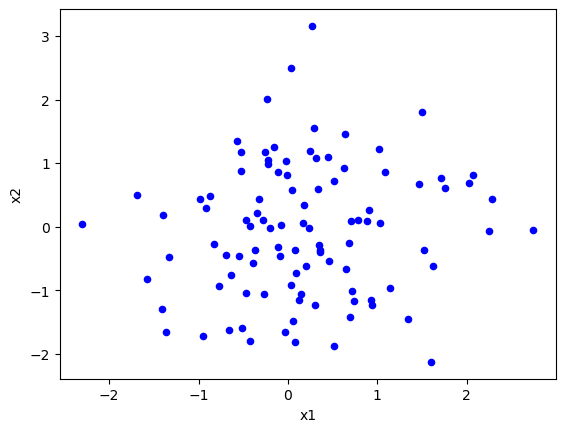

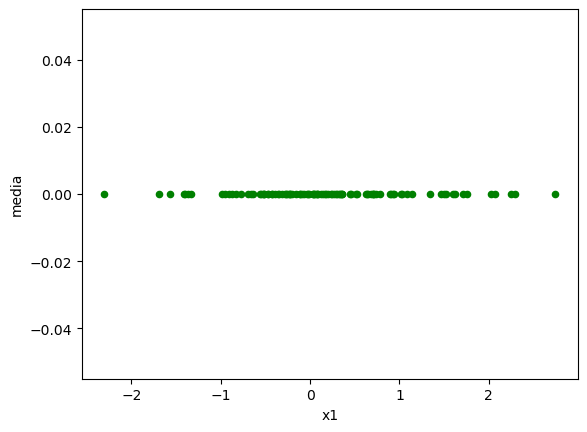

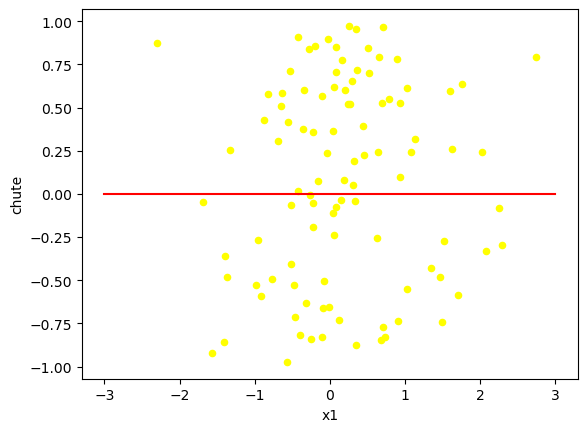

In [27]:
df_pre.plot.scatter(x='x1', y='x2', c='blue')
df_pre.plot.scatter(x='x1', y='media', c='green')
df_pre.plot.scatter(x='x1', y='chute', c='yellow')
# desenhe uma linha par a média do grafico acima
plt.plot([-3, 3], [0, 0], color='red', linestyle='-')


# Técnicas de Classificação
Os algoritmos de aprendizagem de máquina são comumente dívididos em duas famílias: algoritmos de aprendizagem _supervisionada_ e de aprendizagem _não-supervisionada_. Antes de passarmos ao estudo dos algoritmos de classificação propriamente ditos, é preciso compreender alguns conceitos relacionados a essas diferenças, e para isso vamos recorrer a um exemplo.

Imagine que em uma academia de esportes os novos clientes passam por testes físicos para definir a sua afinidade esportiva. Primeiramente, os examinados são submetidos a uma corrida de 100m, e o tempo em segundos é inserido na base de dados como `var1`. Em seguinda, os examinados precisam correr uma longa distância e o tempo em segundos é inserido na base de dados como `var2`. Por fim, os candidatos precisam levantar pesos, e o peso máximo levantado em kgs é inserido na base de dados como `var3`. Perceba que esses dados por si só não têm capacidade de indicar a afinidade esportiva de um candidato.

Almejando obter mais informação sobre os examinados, um profissional de educação física sugere renomear as colunas `var1`, `var2` e `var3` para `velocidade`, `resistência` e `força`, respectivamente. Além disso, foi criada uma variável nova, chamada `aptidao`, onde cada observação poderia receber uma das seguintes categorias `atletismo`, `futebol`, `fisiculturismo`, e o profissional atribuiu à cada cliente uma categoria com base nos seus resultados.

Note que ao fazer isso foi introduzido significado para as variáveis, possibilitando a análise da variável `aptidao` em _relação às demais_. Essa variável `aptidao` é a etiqueta (ou label) dos dados para o problema posto. Note que a etiqueta de um conjunto de dados depende do problema a ser resolvido, e um mesmo conjunto pode ser considerado etiquetado, ou não, dependendo do que se deseja analisar.

Fundamentalmente os algorítmos de aprendizagem não supervisionada se preocupam com tarefas de _agrupamento_, _etiquetagem_, e de _redução de dimensionalidade_ aplicados em dados não etiquetados, habitualmente empregados em uma fase preparatória, anterior à aplicação de algoritmos de aprendizagem supervisionada.

Os algoritmos de aprendizagem supervisionada, por sua vez, são empregados para resolver dois tipos de problema: __regressão__ e __classificação__.

Os algoritmos de regressão se encarregam de receber dados e fornecer uma variável contínua (um número real) como saída. Por exemplo, dado que o cliente x correu 100m em 20 segundos, ele é estimado a correr a longa distância em x segundos. O algoritmo mais conhecido dessa família é a regressão linear.

Por sua vez, os algoritmos de classificação se ocupam das variáveis categóricas discretas, um estado dentre um número finito de possibilidades. Por exemplo, dado os resultados das outras variáveis, o melhor esporte para o cliente é: `fisiculturismo`. Um algoritmo bastante conhecido dessa família é a árvore de decisão.

Nesta apresentação serão abordados os seguintes algoritmos de classificação:
* Regressão Logística
* Support Vector Machine (SVM)
* Árvore de Decisão (Decision Tree)
* Floresta Aleatória (Random Forest)


## Criando o exemplo em código
Iniciamos com a importação das bibliotecas. Note que `pandas`, `numpy` e `matplotlib` são usados na grande maioria dos casos quando utilizamos a linguagem Python, portanto, aprender a utilizar essas bibliotecas é fundamental.
> Uma tarefa importante no estudo de machine learning é a criação de exemplos, tanto dos dados, quanto dos algoritmos. Ser capaz de construir um conjunto ficcional de dados é importante para a demonstração de técnicas de implementação, e construir os algoritmos a partir do zero é importante para desenvolver a intuição por trás dos algoritmos.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# Usando a distribuição normal para gerar dados aleatórios
velocidade = np.random.normal(14, 5, 100)
resisencia = np.random.normal(6180, 2760, 100)
potencia = np.random.normal(70, 50, 100)
df= pd.DataFrame({'velocidade (s)': velocidade, 'resistencia (s)': resisencia, 'potencia (kg)': potencia})
df.head()

,velocidade (s),resistencia (s),potencia (kg)
0,17.705883,12605.733962,58.507884
1,11.850664,2625.083358,63.531764
2,9.837331,3147.160266,97.628038
3,14.534138,4987.091635,26.115009
4,9.485052,5295.917984,146.136291
